__Q1. (a)__ Using trace files, i.e. files that contain addresses issued by some CPU to execute some application(s), draw the histogram of address distribution for each of them (2x20 points). On the Ox axis of the plot you will have the address number (don't start with zero, rather with the smallest address you find in the file and go up to the maximum address in the file). On the Oy axis you will have the number of occurrences for each particular address. Comment based on the histograms (5).

In [1]:
# Import Necessary Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Load the tex file as a pandas dataframe
df1 = pd.read_csv('tex.txt', sep=" ", header=None)
df1.columns = ['operation', 'records']
df1.head(2)

,operation,records
0,2,430d70
1,2,430d74


In [3]:
df_op1 = df1
df1 = df1.drop(df1.columns[0], axis=1)
df1['records_int'] = df1['records'].apply(int, base=16)
df1.shape

(832477, 2)

In [4]:
# Sort the records(rows) for 'records_int' column, add another column to store the frequency of each addresses occurance
df_rec_sorted = df1.sort_values('records_int')
df_rec_sorted['freq'] = df_rec_sorted.groupby('records')['records'].transform('count')
df_rec_sorted =df_rec_sorted.drop_duplicates()
df_rec_sorted = df_rec_sorted.reset_index(drop=True)
df_rec_sorted.shape

(38185, 3)

As we can see from `df_rec_sorted.shape` we have 38185 rows containing unique address records.
To plot a histogram we need to plot frequency of occurance on the OY axis. However, as we have 38K records it is not possible to plot each of the datapoint individually. Instead it makes sense to split 38185 in equal divisions.

Let us find the factors of the number which will help us find a suitable bin size for the histogram

In [5]:
# Find factors of 38185
factors = []
for i in range(1, (38185+1)):
    if 38185 % i == 0:
        factors.append(i)

print(factors)

[1, 5, 7, 35, 1091, 5455, 7637, 38185]


__Factors of 38185 are:__ [1, 5, 7, 35, 1091, 5455, 7637, 38185]

Now if we take each of the 1091 records as one BAR the we have to plot 35 such BARs which is suitable to plot.
    

In [6]:
#Create dataframe df_plot where we will store the AddressRanges and Frequencies of all occurances in those ranges
df_plot = pd.DataFrame(index=range(0,35),columns=['Address Range', 'Frequency'])

#For each of 35 ranges lets store the frequency against the ranges in df_plot as below:
for i in range(0, 35):
    if i==34:
        df_plot['Address Range'].iloc[i] = str(df_rec_sorted['records'].iloc[1091* (i)]) + " - " + \
                                                                                    str(df_rec_sorted['records'].iloc[(-1) ])
        df_plot['Frequency'].iloc[i] =0
        for j in range(0, 1091):
                df_plot['Frequency'].iloc[i] += (df_rec_sorted['freq'].iloc[(1091 * i) + j])
    else:
        df_plot['Address Range'].iloc[i] = str(df_rec_sorted['records'].iloc[1091* (i)]) + " - " + \
                                                                            str(df_rec_sorted['records'].iloc[(1091*(i+1))-1])
        df_plot['Frequency'].iloc[i] =0
        for j in range(0, 1091):
                df_plot['Frequency'].iloc[i] += (df_rec_sorted['freq'].iloc[(1091 * i) + j])  


In [7]:
df_plot

,Address Range,Frequency
0,4328 - 1008e44a,654258
1,1008e44b - 1008e88d,1091
2,1008e88e - 1008ecd0,1091
3,1008ecd1 - 1008f113,1091
4,1008f114 - 1008f556,1091
5,1008f557 - 1008f999,1091
6,1008f99a - 1008fddc,1091
7,1008fddd - 1009021f,1091
8,10090220 - 10090662,1091
9,10090663 - 10090aa5,1091


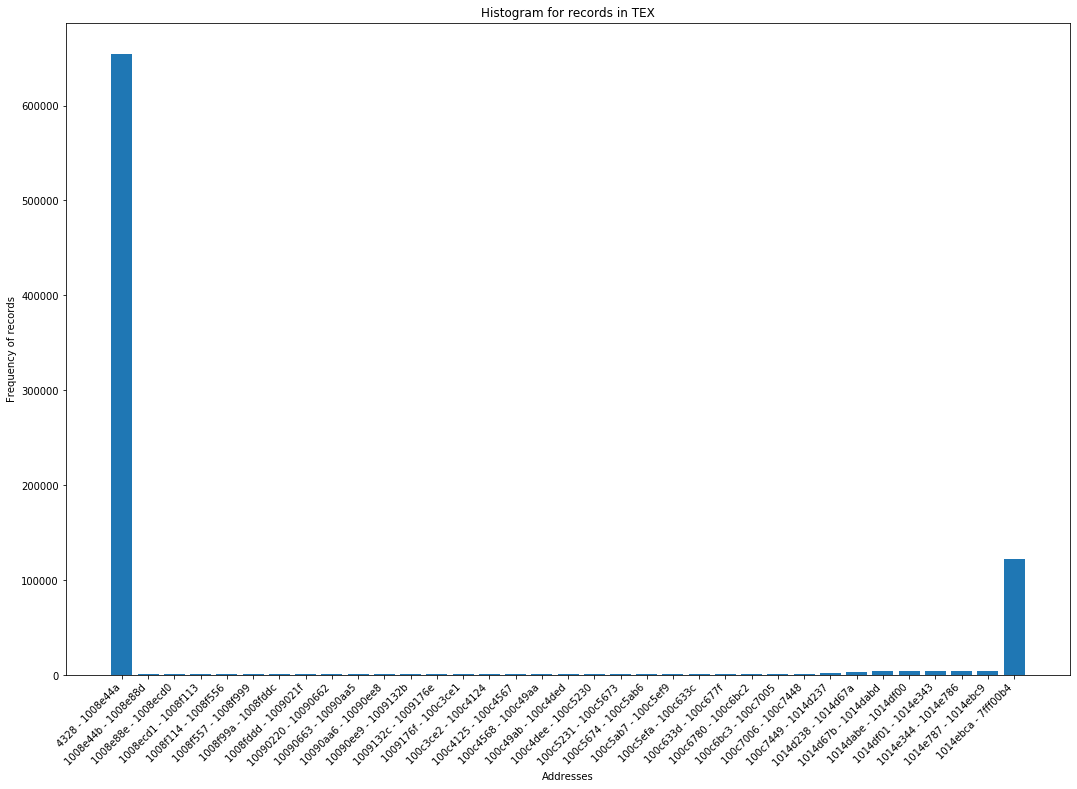

In [8]:
# Plot the Histogram
plt.figure(figsize=(18, 12))
plt.bar(df_plot["Address Range"], df_plot["Frequency"], align='center', alpha=1)
plt.xticks(range(len(df_plot["Address Range"])), rotation = 45, ha="right")
plt.xlabel('Addresses')
plt.ylabel('Frequency of records')
plt.title("Histogram for records in TEX", loc='center')
plt.savefig("hist_tex.png")
plt.show()

In [9]:
# Load the cc1 file as a pandas dataframe
df2 = pd.read_csv('CC1.txt', sep=" ", header=None)
df2.columns = ['operation', 'records']
df_op2 = df2
df2 = df2.drop(df2.columns[0], axis=1)
df2['records_int'] = df2['records'].apply(int, base=16)
df_rec_sorted = df2.sort_values('records_int')
df_rec_sorted['freq'] = df_rec_sorted.groupby('records')['records'].transform('count')
df_rec_sorted =df_rec_sorted.drop_duplicates()
df_rec_sorted = df_rec_sorted.reset_index(drop=True)
df_rec_sorted.shape

(43051, 3)

In [10]:
df_rec_sorted.tail()

,records,records_int,freq
43046,7ffda468,2147329128,733
43047,7ffda470,2147329136,464
43048,7ffda474,2147329140,2180
43049,7ffda478,2147329144,368
43050,7ffda47c,2147329148,2278


In [11]:
# Find factors of 43051
factors = []
for i in range(1, (43051+1)):
    if 43051 % i == 0:
        factors.append(i)

print(factors)

[1, 43051]


It appears that the number 43051 is a prime number.

However, 43050 has factor pairs ( 35, 1230 ). So lets take 34 ranges with 1230 elements each with the 35th range having an extra record : 1231.

In [12]:
#Create dataframe df_plot where we will store the AddressRanges and Frequencies of all occurances in those ranges
df_plot = pd.DataFrame(index=range(0,35),columns=['Address Range', 'Frequency'])

#For each of 35 ranges lets store the frequency against the ranges in df_plot as below:
for i in range(0, 35):
    if i==34:
        df_plot['Address Range'].iloc[i] = str(df_rec_sorted['records'].iloc[1091* (i)]) + " - " + str(df_rec_sorted['records'].iloc[(-1) ])
        df_plot['Frequency'].iloc[i] =0
        for j in range(0, 1091):
                df_plot['Frequency'].iloc[i] += (df_rec_sorted['freq'].iloc[(1091 * i) + j])
    else:
        df_plot['Address Range'].iloc[i] = str(df_rec_sorted['records'].iloc[1091* (i)]) + " - " + str(df_rec_sorted['records'].iloc[(1091*(i+1))-1])
        df_plot['Frequency'].iloc[i] =0
        for j in range(0, 1091):
                df_plot['Frequency'].iloc[i] += (df_rec_sorted['freq'].iloc[(1091 * i) + j])  

#Uncomment below to see the records
#df_plot

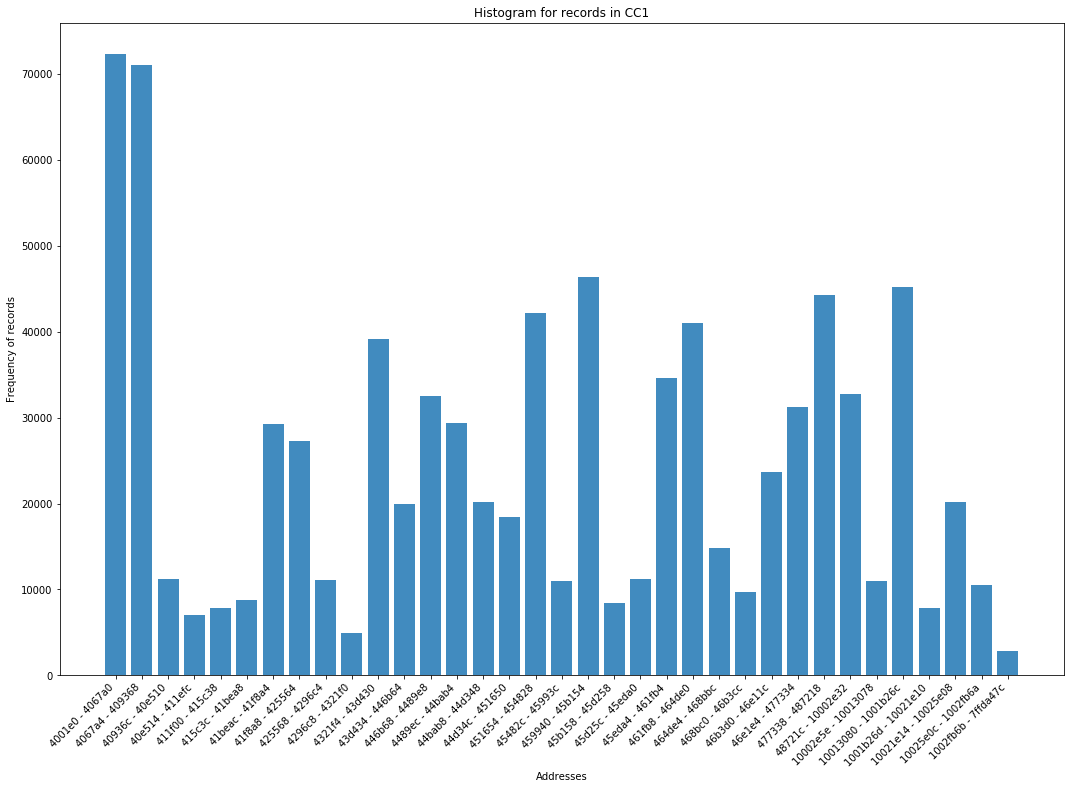

In [13]:
# Plot the Histogram
plt.figure(figsize=(18, 12))
plt.bar(df_plot["Address Range"], df_plot["Frequency"], align='center', alpha=0.85)
plt.xticks(range(len(df_plot["Address Range"])), rotation = 45, ha="right")
plt.xlabel('Addresses')
plt.title("Histogram for records in CC1", loc='center')
plt.ylabel('Frequency of records')
plt.savefig("hist_cc1.png")
plt.show()

__Comments:__ 
    
    For the TEX file the addresses are unevenly distributed compared to the cc1 file. For the TEX plot, most of the records are in the first and last bin of the Histogram : this means the addresses in range `4328 - 1008e44a` and `1014ebca - 7fff00b4` have been used for Read, Write and Instruction fetch operations much more as compared to the other addresses. 
    These two ranges have frequencires of 654258 and 122680 respectively while most of the remaining record ranges have frequencies of about 1k with a few closing near 1.5k
    In case of the CC1 file, however, the distribution is comparitively balanced with first two ranges having large frequencies.
    

-------------------------------------------------------------------------------------------------------------
                                         


__Q1.(b)__

a. What is the frequency of writes (5)? 

b. What is the frequency of reads (5)? 

c. Please comment on these results (5).

__Ans:__ First for the HEX file, to get the frequency or WRITE and READ let us first group the dataframe df (*The dataframe for TEX file*) by operations : 0,1 and 2 where

0: `read data`
1: `write data`
2: `instruction fetch`

In [14]:
df_op1 = df_op1.groupby('operation').count()
df_op1['operation name'] = ['read data', 'write data', 'instruction fetch']
df_op1

,records,operation name
operation,,
0,130655,read data
1,104513,write data
2,597309,instruction fetch


In [15]:
print("The frequency of WRITE in the TEX file is : {} %".format(100 * df_op1['records'].loc[1] / (df_op1['records'].loc[0]+df_op1['records'].loc[1]+df_op1['records'].loc[2]) )) 
print("The frequency of READ in the TEX file is : {} %".format(100 * df_op1['records'].loc[0] / (df_op1['records'].loc[0]+df_op1['records'].loc[1]+df_op1['records'].loc[2])))

The frequency of WRITE in the TEX file is : 12.554460964086696 %
The frequency of READ in the TEX file is : 15.694727902392499 %


In [16]:
#Similarly for the CC1 file
df_op2 = df_op2.groupby('operation').count()
print("The frequency of WRITE in the CC1 file is : {} %".format(100 * df_op2['records'].loc[1] / (df_op2['records'].loc[0]+df_op2['records'].loc[1]+df_op2['records'].loc[2])) )
print("The frequency of READ in the CC1 file is : {} %".format(100 * df_op2['records'].loc[0] / (df_op2['records'].loc[0]+df_op2['records'].loc[1]+df_op2['records'].loc[2])) )

The frequency of WRITE in the CC1 file is : 8.302983394033213 %
The frequency of READ in the CC1 file is : 15.963068073863852 %


### Observations on the results:

1. The frequency of read is clearly more that write for both of the files.
2. Read and Write operations together constitute of ~28% for TEX and ~24% for CC1 out of all the three operations. This means INSTRUCTION FETCH operation has the most frequency, more than TWICE than READ and WRITE combined together.